In [1]:
import numpy as np

In [2]:
x = var("x")

In [3]:
#точное решение
func = x + exp(-2*x)

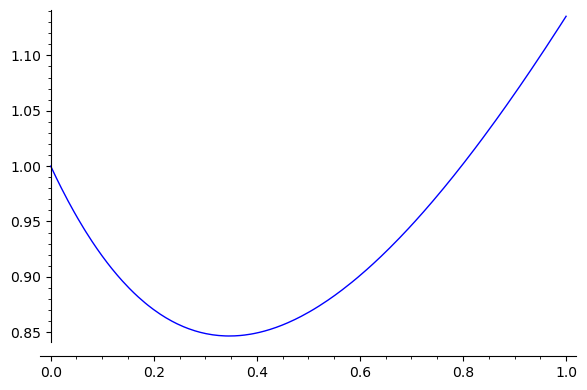

In [4]:
plot(func,xmin = 0,xmax = 1)

## Метод стрельбы

### заданное уравнение

(2x+1) y''+4xy'-4y=0

y'(0) = –1  
y'(1)+2y(1) = 3


#### Представление в виде системы

y'' = (4y - 4xy')/(2x+1)  
  
y' = z  
z' = (4y - 4xz)/(2x+1)  
  
к.у.  
z(0) = -1  
z(1) + 2y(1) = 3  

In [5]:
x,y,z = var("x,y,z")

fy = z
fz = (4*y - 4*x*z)/(2*x + 1)

In [6]:
#z(0) известна
#надо подобрать y(0)

In [7]:
y0 = 0
z0 = -1

На конце проверяется условие  
zl + 2*yl == 3

#### Делаем стрельбу РК4, пристреливаясь дихотомией

In [8]:
yl,zl = var("yl,zl")
yend = 3
test = zl + 2*yl - yend
#границы отрезка
T0 = -2.3
T1 = 2.3

In [9]:
def getlst(y0,h): #получить поледние значения для данного y0
    res = runge_kutta_4(a,b,y0,z0,h)
    return (res[len(res) - 1][1],res[len(res) - 1][2])

def getdiff(y0,h = 0.1): #получить отклонение от искомого значения
    res = getlst(y0,h)
    return test(yl = res[0],zl = res[1])

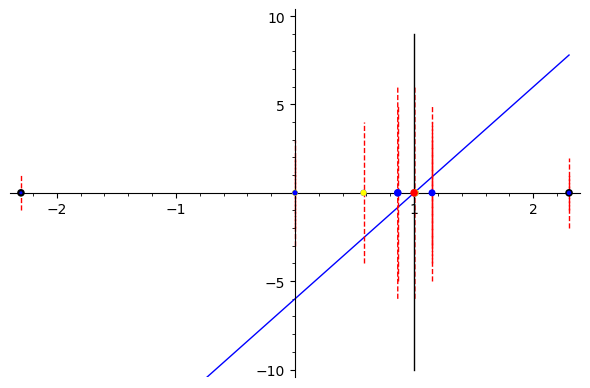

'Найдено значение: y0 = 0.999511718750000\nЗа 11 шагов'

In [56]:
rs = dicht(getdiff,T0,T1, EPS = 0.01,trace= True)
show("Найдено значение: y0 = {}\nЗа {} шагов".format(rs[0],rs[1]))

'График получившейся функции'

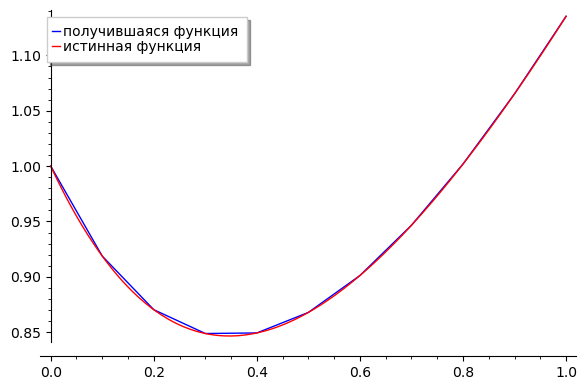

In [64]:
show("График получившейся функции")
res = runge_kutta_4(0,1,rs[0],-1,0.1)
l1 = ([(a[0],a[1]) for a in res])
show(line(l1,legend_label = "получившаяся функция") + 
     plot(func,color = "red",xmin = 0,xmax = 1,legend_label = "истинная функция"))

#### Стрельба РК4, пристреливаясь численным Ньютоном

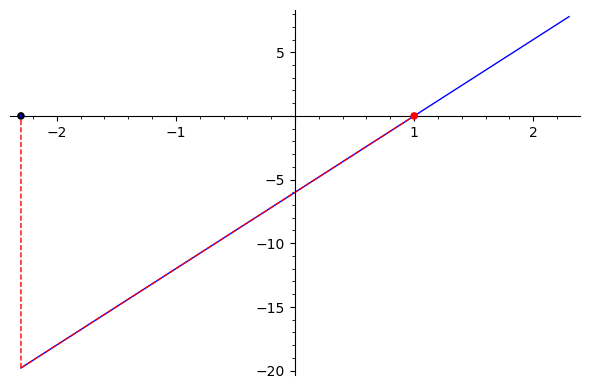

'Найдено значение: y0 = 1.00000000000019\nЗа 2 шагов'

In [65]:
rs = crappy_newton(getdiff,T0,T1, EPS = 0.01,trace= True)
show("Найдено значение: y0 = {}\nЗа {} шагов".format(rs[0],rs[1]))

'График получившейся функции'

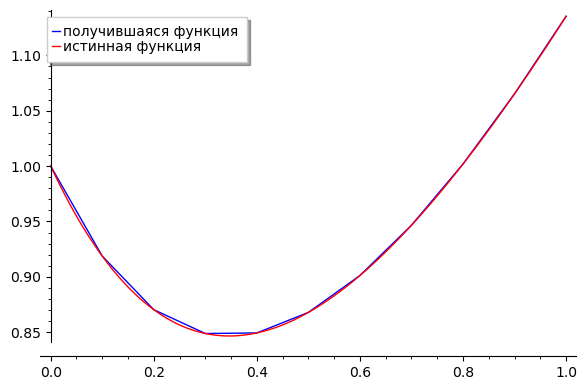

In [66]:
show("График получившейся функции")
res = runge_kutta_4(0,1,rs[0],-1,0.1)
l1 = ([(a[0],a[1]) for a in res])
show(line(l1,legend_label = "получившаяся функция") + 
     plot(func,color = "red",xmin = 0,xmax = 1,legend_label = "истинная функция"))

In [82]:
def shooting_method(h, EPS = 0.01,trace = False):
    rs = crappy_newton(getdiff,T0,T1, EPS = EPS,trace= trace,h = h)
    res = runge_kutta_4(a,b,rs[0],-1,h)
    return res

In [76]:
h = 0.01

In [79]:
show("Метод стрельбы")
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(func,shooting_method(h,0.01)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.1) = {}".format(runge_rumbert_error(shooting_method(h,0.01),shooting_method(h*0.1,0.01),0.1,4).n(digits = 4)))

'Метод стрельбы'

'Ошибка (сравнение с истинным решением) = 0.00002427'

'Ошибка (Рунге-Ромберг | 0.1) = 0.00001927'

## Конечно-разностный метод

(2x+1) y''+4xy'-4y=0

y'(0) = –1  
y'(1)+2y(1) = 3

In [9]:
#y'' + p(x)y' + q(x) = f(x)
#y(a) = y0 
#y(b) = y1

In [10]:
a = 0 
b = 1
p = 4*x/(2*x + 1)
q = -4/(2*x + 1)
ya = -1
yb = 3
f(x) = 0
h = 0.1

In [17]:
def finite_differ(p,q,f,a,b,ya,yb,h = 0.1):
    l = b - a

    ny = int(l/h + 1)#сколько делаем шагов


    names = []
    for i in range(int(ny)):
        names.append("y" + str(i))

    y = var(names) #задание переменных

    xcur = a
    eqs = []

    eqs.append((-3*y[0] + 4*y[1] - y[2])/(2*h) == ya)

    for i in range(1, ny-1):

        xcur += h
        eqs.append((y[i+1] - 2*y[i] + y[i-1])/(h**2) + p(x = xcur)*((y[i+1] - y[i-1])/(2*h)) + q(x = xcur)*y[i] == f(x = xcur))

    xcur += h

    eqs.append((y[ny-3] - 4*y[ny-2] + 3*y[ny-1])/(2*h) + 2*y[ny-1] == yb) 

    sols = solve(eqs,y)

    Y = []

    for k in sols[0]:
        Y.append(k.rhs().n())

    res = []
    xcur = 0
    for k in Y:
        res.append((xcur,k))
        xcur += h

    return res

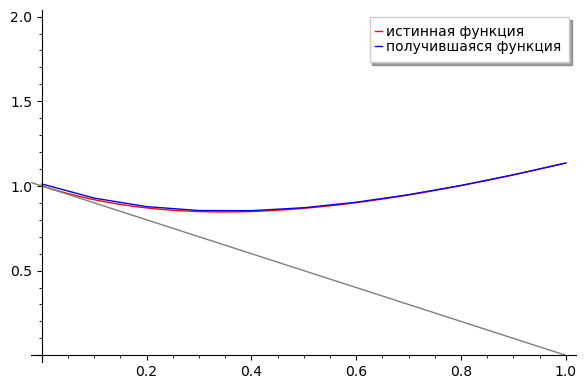

In [17]:
res = finite_differ(p,q,f,a,b,ya,yb,h)

l1 = ([(a[0],a[1]) for a in res])
show(plot(func,color = "red",xmin = 0,xmax = 1,legend_label = "истинная функция") + 
     line(l1,legend_label = "получившаяся функция") + 
     plot(-x + 1, color = "grey") ,xmin = 0,xmax = 1)

In [14]:
h = 0.01

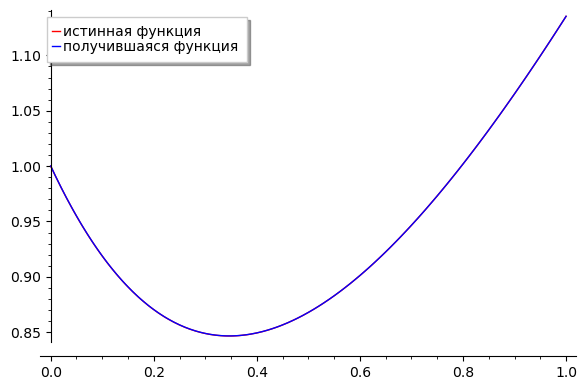

In [22]:
res = finite_differ(p,q,f,a,b,ya,yb,h)

l1 = ([(a[0],a[1]) for a in res])
show(plot(func,color = "red",xmin = 0,xmax = 1,legend_label = "истинная функция") + 
     line(l1,legend_label = "получившаяся функция") ,xmin = 0,xmax = 1)

In [24]:
h = 0.1
show("Конечно-разностный метод")
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(func,finite_differ(p,q,f,a,b,ya,yb,h)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.1) = {}".format(runge_rumbert_error(finite_differ(p,q,f,a,b,ya,yb,h),finite_differ(p,q,f,a,b,ya,yb,h*0.1),0.1,2).n(digits = 4)))

'Конечно-разностный метод'

'Ошибка (сравнение с истинным решением) = 0.05383'

'Ошибка (Рунге-Ромберг | 0.1) = 0.05858'

### Вспомогательные функции

In [18]:
def vaWith0 (pts, p,eps = 1e-10):
    for k in pts:
        if(abs(k[0] - p) < eps):
            return k[1] 

def errSqAvg(func,pts): #счет квадратов ошибок
    sum = 0
    for i in range(len(pts)):
        sum += abs(pts[i][1] - func(x = pts[i][0]))
    return sum/len(pts)

def errSqAvgRR(func,pts1,pts2): #счет квадратов ошибок
    sum = 0
    for i in range(len(pts1)-1):
        sum += abs(pts1[i][1] - func(p = pts1[i][0],pts = pts2))
    return sum/len(pts1)

def runge_rumbert_error(res1, #менее точный результат
                        res2, #более точный результат
                        k, #различие в шаге (k2/k1)
                        order): #порядок точности метода
    #счет ошибки методом Рунге-Ромберга
    dif = errSqAvgRR(vaWith0,res1,res2)
    err = (dif)/(k**order - 1)
    
    return abs(err)

In [19]:
def numeric_derivative(func,h,a,b):
    fa = func(a,h)
    fb = func(b,h)
    
    return (fb - fa)/(b - a)

def crappy_newton(f, a,b, EPS = 1e-6,trace = false,stm = ("auto",0),h = 0.1):    
    #a и b задают границы отображаемого промежутка
    x1 = a
    
    count = 1
    if(trace): 
        p1 = plot(f,xmin = a,xmax = b,plot_points = 20)
        p1 += point((x1, 0), color="black", size=30, zorder=20)
    
    df = numeric_derivative(f,h,x1,x1+EPS)

    while (abs(f(x1,h)) >= EPS):
        if(trace): 
            if(count < 7):
                if(f(x1,h) < 0):
                    v1 = [(x1,y) for y in srange(f(x1,h),0,0.01)]
                    if (x1 > (x1 - f(x1,h)/df)):
                        v2 = [(a,a*df - (x1 - f(x1,h)/df)*df) for a in srange(x1,x1 - f(x1,h)/df,-0.01)]
                    else:
                        v2 = [(a,a*df - (x1 - f(x1,h)/df)*df) for a in srange(x1,x1 - f(x1,h)/df,0.01)]
                else:
                    v1 = [(x1,y) for y in srange(0,f(x1,h),0.01)]
                    if (x1 > (x1 - f(x1,h)/df)):
                        v2 = [(a,a*df - (x1 - f(x1,h)/df)*df) for a in srange(x1,x1 - f(x1,h)/df,-0.01)]
                    else:
                        v2 = [(a,a*df - (x1 - f(x1,h)/df)*df) for a in srange(x1,x1 - f(x1,h)/df,0.01)]
                p1 += point((x1, 0), color="blue", size=5*count, zorder=20)
                p1 += line(v1,color="red",linestyle="--")
                p1 += line(v2,color="red",linestyle="--")

            
        x1 = x1 - f(x1,h)/df
        count+=1
        
        df = numeric_derivative(f,h,x1,x1+EPS)
        if(count > 1000):
            return false
    
    if(trace): 
        p1 += point((x1, 0), color="red", size=30, zorder=20)
    
    if(trace):
        p1.show()
    
    return (x1,count)

In [20]:
#фкнкция, реализующая метод дихотомии
def dicht(f, a, b, EPS = 0.01,trace = False):
    x1 = a
    x2 = b 
    
    mid = (x1 + x2)/2
    
    count = 1
    
    if(trace): 
        p1 = plot(f,xmin = a, xmax = b, plot_points = 30)

        p1 += point((x1, 0), color="black", size=30, zorder=20)
        p1 += point((x2, 0), color="black", size=30, zorder=20)
        p1 += point((mid, 0), color="yellow", size=20, zorder=20)
    
    
    if(f(x1) == 0):
        return x1
    if(f(x2) == 0):
        return x2
    
    if(f(x1) * f(x2) > 0):
        return false
    
    niter = 0
    while(abs(f(mid)) >= EPS):
        niter += 1
        if(trace and count < 7):
            v1 = [(x1,y) for y in srange(-count,count,0.01)]
            v2 = [(x2,y) for y in srange(-count,count,0.01)]
            p1 += point((x1, 0), color="blue", size=5*count, zorder=20)
            p1 += point((x2, 0), color="blue", size=5*count, zorder=20)
            p1 += point((mid, 0), color="yellow", size=5*count, zorder=20)
            p1 += line(v1,color="red",linestyle="--")
            p1 += line(v2,color="red",linestyle="--")
        
        mid = (x1 + x2)/2
        
        if(f(mid) > 0):
            if(f(x1) < 0):
                x2 = mid
            if(f(x2) < 0):
                x1 = mid
        else: 
            if(f(x1) > 0):
                x2 = mid
            if(f(x2) > 0):
                x1 = mid
        count += 1  
        
    if(trace):
        p1 += point((mid, 0), color="red", size=30, zorder=20)
        v1 = [(mid,y) for y in srange(-10,10,1)]
        p1 += line(v1,color="black")
        p1.show(ymin=-10,ymax=10)
        
    return (mid,niter)

In [21]:
def runge_kutta_4(x0,xl,y0,z0,h):
    xcur = x0 #идем из 0 с шагом h
    ycur = y0
    zcur = z0


    result = [(xcur,ycur,zcur)]

    while xcur + h < xl:

        K1 = h*fy(x = xcur,y = ycur, z = zcur)
        L1 = h*fz(x = xcur,y = ycur, z = zcur)

        K2 = h*fy(x = xcur + 0.5*h,y = ycur + 0.5*K1, z = zcur + 0.5*L1)
        L2 = h*fz(x = xcur + 0.5*h,y = ycur + 0.5*K1, z = zcur + 0.5*L1)

        K3 = h*fy(x = xcur + 0.5*h,y = ycur + 0.5*K2, z = zcur + 0.5*L2)
        L3 = h*fz(x = xcur + 0.5*h,y = ycur + 0.5*K2, z = zcur + 0.5*L2)

        K4 = h*fy(x = xcur + h,y = ycur + K3, z = zcur + L3)
        L4 = h*fz(x = xcur + h,y = ycur + K3, z = zcur + L3)

        dy = (1/6)*(K1 + 2*K2 + 2*K3 + K4)
        dz = (1/6)*(L1 + 2*L2 + 2*L3 + L4)


        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result 